# Responsible AI/ML: Diabetes Prediction with Fairness and Transparency (Solution)

## Overview
This exercise demonstrates the principles of **responsible AI/ML** by building a diabetes prediction model using the **Diabetes dataset**. The focus is on ensuring **fairness**, **transparency**, **accountability**, and **explainability** in the machine learning pipeline. Key steps include checking for data bias, using an interpretable model, evaluating performance across subgroups, and visualizing feature importance. The goal is to build a model that is not only accurate but also ethical and 

## Learning Objectives

By the end of this exercise, you will:

- Understand the importance of **responsible AI/ML** principles in building ethical machine learning models.
- Learn how to check for **data bias** and ensure fairness in predictions.
- Use a **transparent and interpretable model** (Logistic Regression) for diabetes prediction.
- Evaluate model performance **across subgroups** to ensure fairness.
- Visualize **feature importance** to explain the model's decision-making process.
- Ensure **reproducibility** by setting a random seed.

## Prerequisites

To follow along with this exercise, you should have:

- Basic knowledge of **Python** and **Pandas** for data manipulation.
- Familiarity with **scikit-learn** for machine learning tasks.
- Understanding of **classification metrics** like accuracy, precision, recall, and F1-score.
- Installation of the following Python libraries: pandas, numpy, scikit-learn, matplotlib, seaborn

## Get Started

Let’s begin by loading the dataset and performing a responsible AI/ML workflow. The workflow includes:
- Load and Prepare Data
- Check for Data Bias
- Train a Transparent Model
- Evaluate Model Performance
- Fairness Check
- Visualize Feature Importance

### Install the required libraries

In [11]:
# Install the necessary libraries for data manipulation, machine learning, and visualization
# pandas: for data handling and analysis
# numpy: for numerical computations
# scikit-learn: for machine learning models and metrics
# matplotlib: for creating static, animated, and interactive visualizations
# seaborn: for statistical data visualization built on top of matplotlib
%pip install pandas numpy scikit-learn matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Import the necessary libraries

In [12]:
# Import necessary libraries for data manipulation, model training, and visualization
import numpy as np  # For numerical operations and random seed control
import pandas as pd  # For data manipulation and analysis
from sklearn.datasets import load_diabetes  # To load the Diabetes dataset (regression problem)
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler  # To scale features for better model performance
from sklearn.linear_model import LogisticRegression  # To use Logistic Regression for classification
from sklearn.metrics import accuracy_score, classification_report  # To evaluate model performance
import matplotlib.pyplot as plt  # For visualizing data and results
import seaborn as sns  # For advanced visualization with a focus on statistical plots

# Set random seed for reproducibility
np.random.seed(42)

### 1. Data Preparation and Bias Awareness

**Responsible AI Principle: Fairness and Bias Mitigation**
- The code checks for potential bias in the dataset by examining the distribution of the sex feature.
- This step ensures that the dataset does not disproportionately represent one group over another, which could lead to biased predictions.

In [13]:
# Function to load and prepare the diabetes dataset for classification
def load_and_prepare_data():
    # Load the diabetes dataset (originally a regression problem)
    diabetes = load_diabetes()  # This loads the dataset as a dictionary-like object
    
    # Create a DataFrame for the features (X) from the loaded data
    X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
    
    # Convert the regression target (diabetes.target) to a binary classification target
    # Use the median of the target as a threshold: values above the median = 1 (diabetic),
    # values below the median = 0 (non-diabetic)
    y = (diabetes.target > np.median(diabetes.target)).astype(int)  # Converts to 0 or 1
    
    # Combine the features and the target variable into a single DataFrame
    data = X.copy()  # Create a copy of the features DataFrame
    data['diabetes'] = y  # Add the binary target column 'diabetes'
    
    return data  # Return the combined dataset

# Load and prepare the dataset
data = load_and_prepare_data()

# Print the shape of the dataset to check the number of rows and columns
print("Dataset shape:", data.shape)

# Display the first few rows of the dataset to get an overview
print("\nDataset preview:")
print(data.head())

# Check for bias in the data by looking at the distribution of the 'sex' feature
print("\nSex distribution:")
# Display the normalized value counts (percentage) of the 'sex' feature to see if there is any imbalance
print(data['sex'].value_counts(normalize=True))

Dataset shape: (442, 11)

Dataset preview:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  diabetes  
0 -0.002592  0.019907 -0.017646         1  
1 -0.039493 -0.068332 -0.092204         0  
2 -0.002592  0.002861 -0.025930         1  
3  0.034309  0.022688 -0.009362         1  
4 -0.002592 -0.031988 -0.046641         0  

Sex distribution:
sex
-0.044642    0.531674
 0.050680    0.468326
Name: proportion, dtype: float64


The *sex* feature in the Diabetes dataset is encoded as numerical values:
- -0.044642 represents one category of sex (e.g., female).
- 0.050680 represents the other category of sex (e.g., male).

The numbers on the right (0.531674 and 0.468326) represent the proportion of each category in the dataset:
- -0.044642 (e.g., female) makes up 53.17% of the dataset.
- 0.050680 (e.g., male) makes up 46.83% of the dataset.

The dataset is slightly imbalanced with respect to the sex feature, with one category (e.g., female) being more represented than the other (e.g., male). This imbalance is not extreme, but it’s important to monitor how the model performs across these subgroups to ensure fairness.

**Why This Matters**
- Fairness:
    - If the dataset is imbalanced with respect to a sensitive feature like sex, the model might learn to favor the majority group, leading to biased predictions.
    - By checking the distribution, we ensure that the dataset does not disproportionately represent one group over another.

- Subgroup Performance:
    - Later in the code, the model’s performance is evaluated across these subgroups (e.g., sex) to ensure that it performs equally well for all groups.
  
**Key Takeways**
- The *sex* distribution shows that the dataset is slightly imbalanced, but not severely.
- Monitoring subgroup performance ensures that the model does not favor one group over another.
- Responsible AI/ML requires checking for bias and ensuring fairness in predictions.

### 2. Model Transparency
**Responsible AI Principle: Transparency**
- The code uses a simple and interpretable model (**Logistic Regression**) instead of a complex "black-box" model.
- Logistic Regression provides clear insights into how each feature contributes to the prediction, making the model more transparent.

In [14]:
# Features and target
X = data.drop('diabetes', axis=1)  # Drop the target column ('diabetes') to get the feature set (X)
y = data['diabetes']  # Extract the target column ('diabetes') as the target variable (y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the data into training (80%) and testing (20%) sets, with a fixed random seed for reproducibility

# Scale features for better model performance
scaler = StandardScaler()  # Create a StandardScaler object to standardize the features
X_train_scaled = scaler.fit_transform(X_train)  # Fit the scaler to the training data and apply transformation
X_test_scaled = scaler.transform(X_test)  # Apply the same scaling transformation to the test data

# Train model with transparency (simple logistic regression)
model = LogisticRegression(random_state=42, max_iter=1000)  # Initialize a logistic regression model with a fixed random seed
model.fit(X_train_scaled, y_train)  # Train the model on the scaled training data

LogisticRegression(max_iter=1000, random_state=42)

### 3. Model Evaluation and Accountability
**Responsible AI Principle: Accountability**
- The model is evaluated using accuracy and a detailed classification report, which includes precision, recall, and F1-score.
- This ensures that the model's performance is thoroughly assessed and that potential issues (e.g., low recall for a specific class) are identified.


In [15]:
# Make predictions on the test set using the trained model
y_pred = model.predict(X_test_scaled)  # Predict the target (diabetes) for the test set

# Evaluate model responsibly
# Accuracy: Calculate how often the model's predictions match the actual labels
accuracy = accuracy_score(y_test, y_pred)  # Compare predicted values (y_pred) to the true values (y_test)
print("\nModel Accuracy:", accuracy)  # Print the accuracy score

# Detailed classification report: Provides more in-depth evaluation metrics
print("\nClassification Report:")
# Generate a detailed classification report with metrics such as precision, recall, F1-score, and support
print(classification_report(y_test, y_pred))  # Print the classification report for more insights


Model Accuracy: 0.7303370786516854

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        49
           1       0.69      0.72      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



**Introduction of Terms**
|Term|Definition|
|----|----------|
|Precision|The proportion of correctly predicted positive instances out of all instances predicted as positive|
|Recall|The proportion of correctly predicted positive instances out of all actual positive instances|
|F1-Score|The harmonic mean of precision and recall. It balances the two metrics|
|Support|The number of actual occurrences of each class in the test set|
|Macro Avg|The average of precision, recall, and F1-score across both classes, without considering class imbalance|
|Weighted Avg|The average of precision, recall, and F1-score across both classes, weighted by the number of instances in each class|


**Accurcy**
- Accuracy is a measure of overall correctness but does not provide insights into how well the model performs for each class.
- While 73.03% accuracy is decent, it’s important to look at other metrics (precision, recall, F1-score) to understand the model’s performance in more detail.

**Classification Report**
- Class 0 (e.g., Non-Diabetic):
    - The model performs slightly better for class 0 compared to class 1.
    - Precision (0.77) and recall (0.73) are relatively balanced, resulting in a good F1-score (0.75).
- Class 1 (e.g., Diabetic):
    - The model performs slightly worse for class 1 compared to class 0.
    - Precision (0.69) and recall (0.72) are lower, resulting in a slightly lower F1-score (0.71).
- Overall Performance:
    - The model’s performance is balanced across both classes, as indicated by the macro avg and weighted avg values (0.73 for precision, recall, and F1-score).
    - However, there is room for improvement, especially for class 1 (diabetic), where precision and recall are lower.
**Key Takeaways**
- The model achieves 73.03% accuracy, which is a decent starting point but can be improved.
- The model performs slightly better for class 0 (non-diabetic) than for class 1 (diabetic).
- The F1-scores for both classes are relatively balanced, indicating that the model is not heavily biased toward one class.
- To improve the model:
    - Address class imbalance (if present) using techniques like SMOTE.
    - Experiment with more complex models or feature engineering to improve precision and recall for class 1.

### 4. Fairness Check
**Responsible AI Principle: Fairness**
- The code evaluates the model's performance across different groups (e.g., sex) to ensure that the model does not disproportionately favor or disadvantage any group.
- This step helps identify and address potential fairness issues in the model's predictions.

In [16]:
# 4. Fairness check - performance across sex
# Create a copy of the test data to add the true and predicted labels for evaluation
test_data = X_test.copy()  # Copy the test feature set
test_data['diabetes_true'] = y_test  # Add the true diabetes labels (y_test)
test_data['diabetes_pred'] = y_pred  # Add the predicted diabetes labels (y_pred)

# Print the fairness evaluation by sex (assuming 'sex' is a feature in the dataset)
print("\nPerformance by Sex:")
# Loop through the unique values of 'sex' in the test data to evaluate performance by sex
for sex in test_data['sex'].unique():
    sex_data = test_data[test_data['sex'] == sex]  # Filter data for the current sex category
    # Calculate accuracy for the current sex category
    accuracy_sex = accuracy_score(sex_data['diabetes_true'], sex_data['diabetes_pred'])
    # Print the accuracy for the current sex group
    print(f"Sex {sex:.3f} Accuracy: {accuracy_sex:.3f}")


Performance by Sex:
Sex -0.045 Accuracy: 0.708
Sex 0.051 Accuracy: 0.756


The *sex* feature is encoded as numerical values:
- -0.045 represents one category of sex (e.g., female).
- 0.051 represents the other category of sex (e.g., male).

Accuracy: The proportion of correctly predicted instances for each subgroup.
- For sex = -0.045: The model achieves 70.8% accuracy.
- For sex = 0.051: The model achieves 75.6% accuracy.

The results indicate:
- Performance Discrepancy:
    - The model performs slightly better for the subgroup with sex = 0.051 (e.g., male) compared to the subgroup with sex = -0.045 (e.g., female).
    - The difference in accuracy is 4.8 percentage points (75.6% - 70.8%).
- Fairness Implications:
    - A significant difference in performance across subgroups could indicate bias in the model.
    - In this case, the difference is relatively small, but it’s still important to investigate further to ensure fairness.
- Possible Causes:
    - Imbalanced Data: If one subgroup is underrepresented in the dataset, the model may not learn enough about that subgroup.
    - Feature Representation: The features used for prediction may not capture the characteristics of one subgroup as effectively as the other.
    - Model Bias: The model may inherently favor one subgroup due to the way it was trained.

**Key Takeaways**
- The model’s performance is not perfectly balanced across the sex subgroups.
- While the difference in accuracy is relatively small (4.8 percentage points), it’s still important to ensure that the model is fair and unbiased.
- To address this discrepancy:
    - Check for imbalanced representation of subgroups in the dataset.
    - Use techniques like SMOTE to balance the dataset.
    - Evaluate other fairness metrics (e.g., precision, recall, F1-score) across subgroups.
    - Consider using fairness-aware algorithms to mitigate bias.

### 5. Feature Importance and Explainability
**Responsible AI Principle: Explainability**
- The code calculates and visualizes the feature importance based on the model's coefficients.
- This provides insights into which features are most influential in the model's predictions, making the model's behavior more interpretable and explainable.

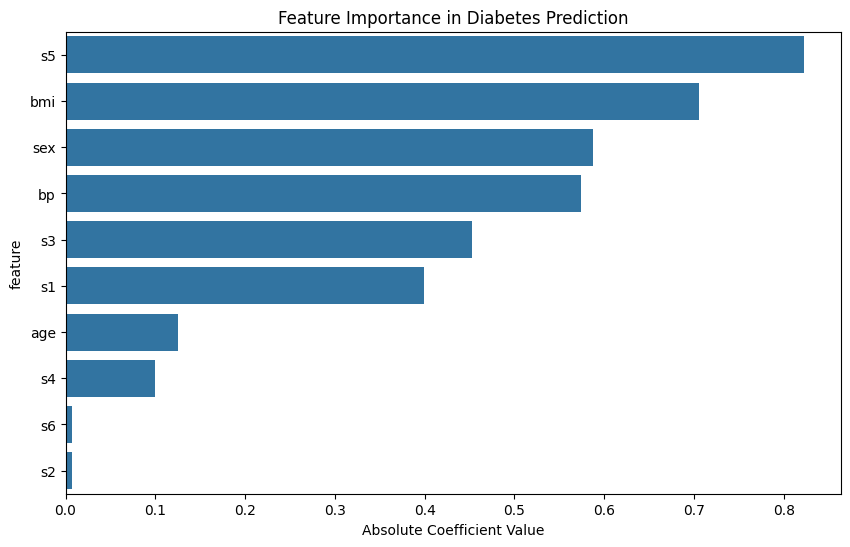

In [17]:
# 5. Transparency - Feature importance
# Create a DataFrame to store the features and their corresponding absolute coefficient values
feature_importance = pd.DataFrame({
    'feature': X.columns,  # Get the feature names from the original dataset
    'coefficient': np.abs(model.coef_[0])  # Get the absolute values of the coefficients from the trained model
})

# Sort the features based on their absolute coefficient values in descending order
feature_importance = feature_importance.sort_values('coefficient', ascending=False)

# Visualization of feature importance
plt.figure(figsize=(10, 6))  # Create a figure with specified dimensions
sns.barplot(x='coefficient', y='feature', data=feature_importance)  # Create a horizontal bar plot
plt.title('Feature Importance in Diabetes Prediction')  # Add a title to the plot
plt.xlabel('Absolute Coefficient Value')  # Label the x-axis with the coefficient values
plt.show()  # Display the plot

### Understanding the Feature Importance Plot

The feature importance plot visualizes the contribution of each feature to the model’s predictions. Let’s break it down:

#### Plot Description

1. **X-Axis (Absolute Coefficient Value)**:
   - Represents the magnitude of the feature’s coefficient in the Logistic Regression model.
   - Higher values indicate that the feature has a stronger influence on the model’s predictions.

2. **Y-Axis (Feature Names)**:
   - Lists the features used in the model.
   - Features are ordered from top to bottom based on their importance (highest to lowest).

#### Key Observations

1. **Top Features**:
   - The features with the highest absolute coefficient values are the most important for the model’s predictions.
   - In this case, **bmi** (Body Mass Index) and **sex** are the top two features, indicating they have the strongest influence on the model’s predictions.

2. **Mid-Range Features**:
   - Features like **bp** (Blood Pressure) and **s3** (e.g., a specific blood test result) also contribute significantly but to a lesser extent than the top features.

3. **Less Important Features**:
   - Features like **s2** and **s6** have lower absolute coefficient values, indicating they have a weaker influence on the model’s predictions.

#### Interpretation of Results

1. **bmi** (Body Mass Index)**:
   - **High Importance**: BMI is a well-known risk factor for diabetes, so it’s expected to have a strong influence on the model’s predictions.

2. **sex**:
   - **High Importance**: Sex may play a role in diabetes risk, and the model has identified it as a significant feature.

3. **bp** (Blood Pressure):
   - **Moderate Importance**: Blood pressure is another known risk factor for diabetes, and its moderate importance aligns with medical knowledge.

4. **Other Features**:
   - Features like **s1**, **s3**, **s4**, and **s6** are likely related to blood test results or other medical measurements. Their lower importance suggests they have a smaller impact on the model’s predictions.

#### Key Takeaways

1. The feature importance plot provides insights into which features the model considers most important for predicting diabetes.
2. **bmi** and **sex** are the most influential features, followed by **bp** and other medical measurements.
3. Understanding feature importance helps:
   - **Explain the model’s predictions** to stakeholders.
   - **Identify key risk factors** for diabetes.
   - **Simplify the model** by removing less important features (if necessary).

#### Next Steps

1. **Validate Feature Importance**:
   - Cross-check the importance of features with domain knowledge to ensure they align with medical understanding.

2. **Feature Engineering**:
   - Explore interactions between important features (e.g., bmi and sex) to improve model performance.

3. **Model Simplification**:
   - Consider removing less important features to reduce model complexity without sacrificing performance.

4. **Communicate Results**:
   - Use the feature importance plot to explain the model’s decision-making process to stakeholders.

### 6. Reproducibility
**Responsible AI Principle: Reproducibility**
- The code sets a random seed to ensure that the results are reproducible.
- This is critical for transparency and accountability, as it allows others to replicate the results and verify the findings.

In [18]:
# Set random seed for reproducibility
np.random.seed(42)

### Summary of Responsible AI/ML Principles Used in the Exercise

| Principle	| Implementation |
|-----------|----------------|
| Fairness | Checks for bias in the dataset and evaluates model performance across subgroups|
| Transparency| Uses a simple and interpretable model (Logistic Regression)|
| Accountability |	Thoroughly evaluates model performance using accuracy and classification reports|
| Explainability|	Visualizes feature importance to explain the model's decision-making process|
|Reproducibility|	Sets a random seed to ensure results can be replicated|

The exercise demonstrates responsible AI/ML by:
- Ensuring fairness through bias checks and subgroup performance evaluation.
- Promoting transparency and explainability by using an interpretable model and visualizing feature importance.
- Ensuring accountability through thorough model evaluation.
- Guaranteeing reproducibility by setting a random seed.

These practices align with ethical AI/ML principles and help build trust in the model's predictions. By following these steps, the code ensures that the model is not only accurate but also fair, transparent, and accountable.

## Conclusion
This exercise demonstrates how to build a responsible AI/ML model for diabetes prediction by incorporating key ethical principles:
- **Fairness**: The model's performance is evaluated across subgroups to ensure it does not disproportionately favor or disadvantage any group.
- **Transparency**: A simple and interpretable model (Logistic Regression) is used to make the model's behavior understandable.
- **Accountability**: The model's performance is thoroughly evaluated using accuracy and a detailed classification report.
- **Explainability**: Feature importance is visualized to explain the model's decision-making process.
- **Reproducibility**: A random seed is set to ensure the results can be replicated.

By following these principles, the project ensures that the model is not only accurate but also ethical, fair, and trustworthy.

## Next Steps
- Experiment with other datasets to apply responsible AI/ML principles.
- Explore additional fairness metrics (e.g., demographic parity, equalized odds).
- Try other interpretable models (e.g., Decision Trees, SHAP explanations) to enhance explainability.
- Investigate the impact of feature engineering on fairness and transparency.

## Clean up

Remember to shut down your Jupyter Notebook environment and delete any unnecessary files or resources once you've completed the exercise. 